Accuracy:  9514882.577149898
MAPE:  0.5681378318699288


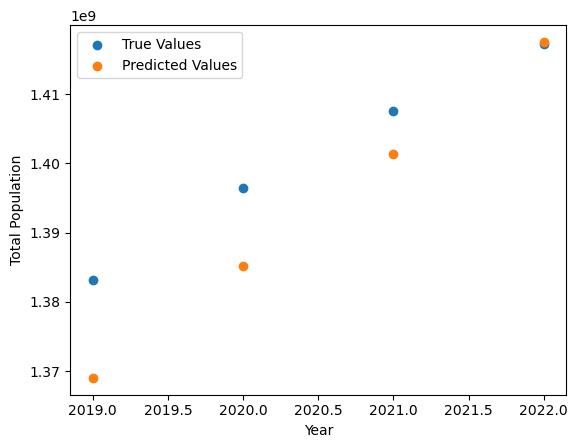

In [1]:
#Linear Regression Model
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load population data into a dataframe
data = pd.read_csv("density rankdata.csv")

# Split the data into training and test sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

# Define the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(train_data[["Year"]], train_data["TotalPopulation"])

# Make predictions on the test data
predictions = model.predict(test_data[["Year"]])

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data["TotalPopulation"], predictions))

# Calculate the mean absolute percentage error (MAPE)
mape = 100 * mean_absolute_error(test_data["TotalPopulation"], predictions) / test_data["TotalPopulation"].mean()

# Print the accuracy score (1-RMSE)
accuracy = 1-rmse
print("Accuracy: ", abs(accuracy))
print("MAPE: ", mape)

# Plot the predicted and true values with year
plt.scatter(test_data["Year"], test_data["TotalPopulation"], label="True Values")
plt.scatter(test_data["Year"], predictions, label="Predicted Values")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.show()



Accuracy:  101.38735024251116
MAPE:  4.684622083850703e-06


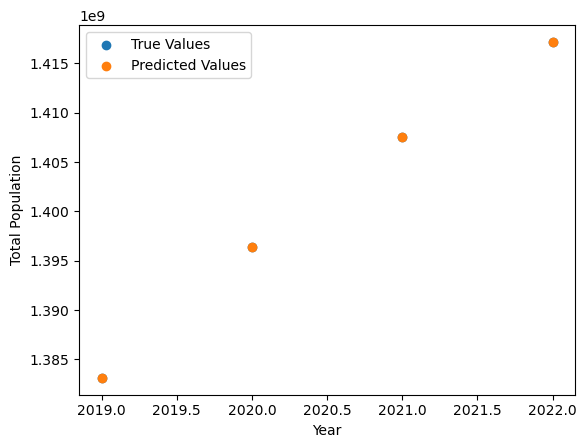

In [6]:
#Multivariate Linear Regression Model
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load population data into a dataframe
data = pd.read_csv("density rankdata.csv")

# Split the data into training and test sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

# Define the Multi-Variate Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(train_data[["Year", "Density", "GrowthRate"]], train_data["TotalPopulation"])

# Make predictions on the test data
predictions = model.predict(test_data[["Year", "Density", "GrowthRate"]])

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data["TotalPopulation"], predictions))

# Calculate the mean absolute percentage error (MAPE)
mape = 100 * mean_absolute_error(test_data["TotalPopulation"], predictions) / test_data["TotalPopulation"].mean()

# Print the accuracy score (1-RMSE)
accuracy = 1-rmse
print("Accuracy: ", abs(accuracy))
print("MAPE: ", mape)

# Plot the predicted and true values with year
plt.scatter(test_data["Year"], test_data["TotalPopulation"], label="True Values")
plt.scatter(test_data["Year"], predictions, label="Predicted Values")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.show()


Accuracy:  97050370.18027295
MAPE:  5.747771806156359


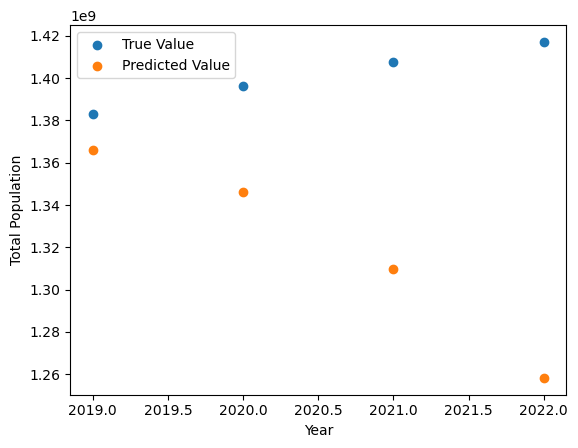

In [7]:
#ARMA model with (p,q) value as (2,1)
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Load population data into a dataframe
data = pd.read_csv("density rankdata.csv")

# Split the data into training and test sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

# Define the ARMA model
model = ARIMA(train_data["TotalPopulation"], order=(2, 0, 1))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data["TotalPopulation"], predictions))

# Calculate the mean absolute percentage error (MAPE)
mape = 100 * np.mean(np.abs((test_data["TotalPopulation"] - predictions) / test_data["TotalPopulation"]))

# Print the accuracy score (1-RMSE)
accuracy = 1-rmse
print("Accuracy: ", abs(accuracy))
print("MAPE: ", mape)

# Plot the predicted and true values with the year
plt.scatter(test_data.Year, test_data.TotalPopulation, label='True Value')
plt.scatter(test_data.Year, predictions, label='Predicted Value')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.show()


In [8]:

# ARIMA model with (p,d,q) value as (1,1,1)
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import numpy as np

# load dataset
data = pd.read_csv('density rankdata.csv')

# check for stationarity
result = adfuller(data['TotalPopulation'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# if p-value > 0.05, data is not stationary
if result[1] > 0.05:
    # decompose the time series
    decomposition = seasonal_decompose(data['TotalPopulation'], period=9)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    data['population_stationary'] = residual
    data.dropna(inplace=True)
else:
    data['population_stationary'] = data['TotalPopulation']

# Split the data into training and test sets
train_data = data[:int(len(data['population_stationary'])*0.8)]
test_data = data[int(len(data['population_stationary'])*0.8):]

# fit ARIMA model
model = ARIMA(data['population_stationary'], order=(1,1,1))
model_fit = model.fit()
# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))


# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Calculate MAPE
mape = np.mean(np.abs((test_data['population_stationary'] - predictions) / test_data['population_stationary'])) * 100
print("MAPE: ", mape)

# Calculate RMSE
rmse = np.sqrt(np.mean((test_data['population_stationary'] - predictions)**2))
print("RMSE: ", rmse)


ADF Statistic: 1.814936
p-value: 0.998378
MAPE:  90.98902996163804
RMSE:  20797900.86643293


C:\Users\archo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\archo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\archo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\archo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\archo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results 

MAPE:  5.03691344086895e-05
Accuracy:  719.2637133405956


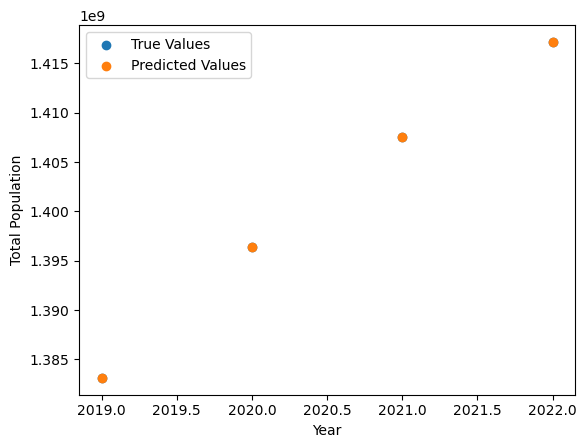

In [3]:
#ANN model with 3 hidden layers
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Load population data into a dataframe
data = pd.read_csv("density rankdata.csv")

# Split the data into training and test sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

# Define the neural network model
model = MLPRegressor(hidden_layer_sizes=(10,3), max_iter=800000)

# Fit the model using the training data
model.fit(train_data[["Year", "Density", "GrowthRate"]], train_data["TotalPopulation"])

# Make predictions on the test data
predictions = model.predict(test_data[["Year", "Density", "GrowthRate"]])

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data["TotalPopulation"], predictions))

# Calculate the mean absolute percentage error (MAPE)
mape = 100 * np.mean(np.abs((test_data["TotalPopulation"] - predictions) / test_data["TotalPopulation"]))

# Print the mean absolute percentage error (MAPE)
print("MAPE: ", mape)


# Print the accuracy score (1-RMSE)
accuracy = 1-rmse
print("Accuracy: ", abs(accuracy))

# Plot the true values and predicted values with the year
plt.scatter(test_data["Year"], test_data["TotalPopulation"], label="True Values")
plt.scatter(test_data["Year"], predictions, label="Predicted Values")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.show()


[1444970446 1504434263 1554978512]
[22.15838268 20.49168819 18.61292319]


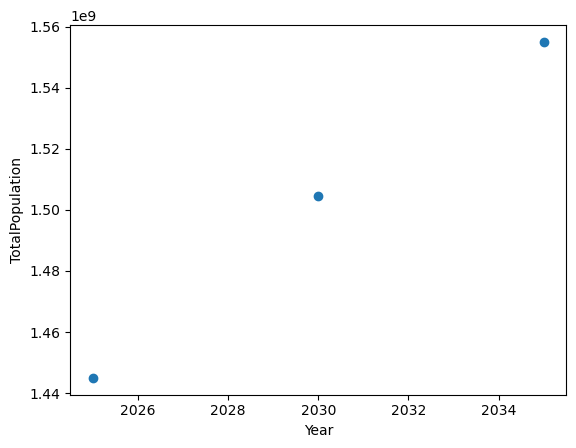

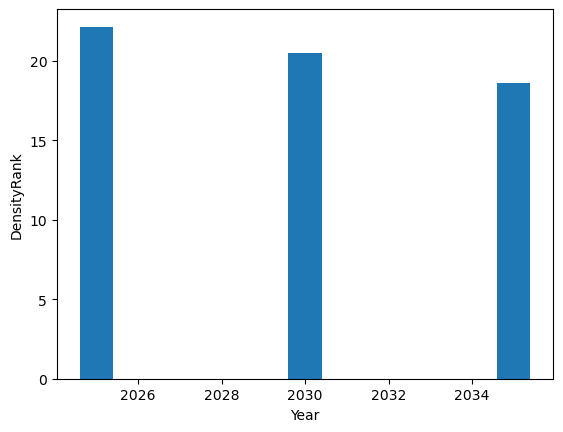

In [4]:
#Future population and density rank prediction using multivariate linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Load population data into a dataframe
data = pd.read_csv("density rankdata.csv")

# Split the data into training and test sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

# Define the linear regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(train_data[["Year", "Density"]], train_data["TotalPopulation"])

# Make predictions on future data of population 
future_data = pd.DataFrame({"Year": [2025, 2030, 2035], "Density": [486,506,523]})
future_predictions = model.predict(future_data)

future_prediction_arr = np.array(future_predictions, dtype=np.int64)
print(future_prediction_arr)
# Define the linear regression model
model1= LinearRegression()

#Fit the model using the training data
model1.fit(train_data[["Year", "Density", "TotalPopulation"]], train_data["DensityRank"])

#Make predictions on future data of population 
future_data1 = pd.DataFrame({"Year": [2025, 2030, 2035], "Density": [486,506,523], 
                             "TotalPopulation":[future_prediction_arr[0],future_prediction_arr[1],future_prediction_arr[2]]})
future_predictions1 = model1.predict(future_data1)

print(future_predictions1)


# Create a new dataframe with the year and predicted density rank
future_data_predicted = pd.DataFrame({"Year": [2025, 2030, 2035], "TotalPopulation": future_predictions})
future_data_predicted1 = pd.DataFrame({"Year": [2025, 2030, 2035], "DensityRank": future_predictions1})

# Plot the histogram
plt.scatter(future_data_predicted["Year"], future_data_predicted["TotalPopulation"])

# Set the x-axis label to "Year"
plt.xlabel("Year")

# Set the y-axis label to "Total Population"
plt.ylabel("TotalPopulation")


# Show the plot
plt.show()

# Plot the histogram for density rank
plt.bar(future_data_predicted["Year"], future_data_predicted1["DensityRank"])

# Set the x-axis label to "Year"
plt.xlabel("Year")

# Set the y-axis label to "Total Population"
plt.ylabel("DensityRank")


# Show the plot
plt.show()





[1444970489 1504434338 1554978629]


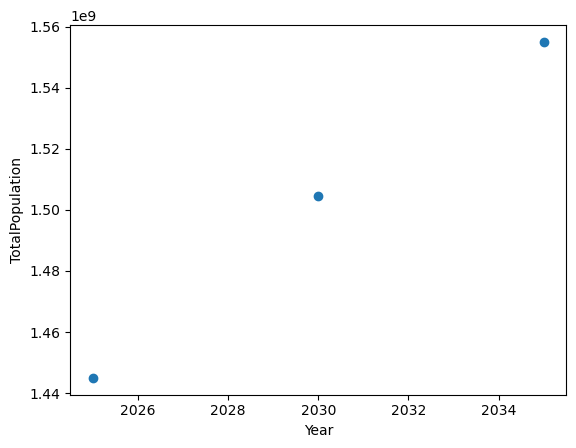

In [2]:
#Future population prediction using ANN model with 2 hidden layers 
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt


#Load population data into a dataframe
data = pd.read_csv("density rankdata.csv")

#Split the data into training and test sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

#Define the neural network model
model = MLPRegressor(hidden_layer_sizes=(10,2), max_iter=150000)

#Fit the model using the training data
model.fit(train_data[["Year", "Density"]], train_data["TotalPopulation"])

#Make predictions on future data of population 
future_data = pd.DataFrame({"Year": [2025, 2030, 2035], "Density": [486,506,523]})
future_predictions = model.predict(future_data)
future_prediction_arr = np.array(future_predictions, dtype=np.int64)
print(future_prediction_arr)




# Create a new dataframe with the year and predicted density rank
future_data_predicted = pd.DataFrame({"Year": [2025, 2030, 2035], "TotalPopulation": future_predictions})


# Plot the histogram
plt.scatter(future_data_predicted["Year"], future_data_predicted["TotalPopulation"])

# Set the x-axis label to "Year"
plt.xlabel("Year")

# Set the y-axis label to "Total Population"
plt.ylabel("TotalPopulation")

# Show the plot
plt.show()

